In [1]:
import mdtraj as md
import numpy as np
from tqdm import tqdm
import sys
import os
import matplotlib.pyplot as plt

sys.path.append("..")  # Avoid error with importing of src
# from src.utils_py.stat_ineff import get_center_pbc, apply_pbc, get_numerical_density_profile, get_each_density_profiles_and_angles
# from src.utils_py.profile_approx import _profile_approx_alpha_from_array
from src.utils_py.stat_ineff import get_statistical_inefficiency_RCA, get_each_density_profiles

---

In [2]:
trajectory_file = '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.5/cal_dec_tip4p.xtc'
topology_file = '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.5/cal_dec_tip4p.gro'
residue = 'DECAN'
H = 9
l, phi = 18.004 / H, 0.5
rho_bulk = 3.0896 * 10
interface_type = 'roll'
sl=200
block_lenght=1_000
begin_time=0
time=40_000
timestep=2
units=1
display=False


axises_2_5, denses_2_5, angles_2_5 = get_each_density_profiles_and_angles(
    trajectory_file,
    topology_file,
    rho_bulk,
    l,
    phi,
    H,
    'roll',
    'DECAN',
    200,
    block_lenght,
    begin_time,
    time,
    timestep,
    display=display
)


00%|███████████████████████████████████████████████████████████████████████████| 40/40 [05:25<00:00,  8.14s/it]

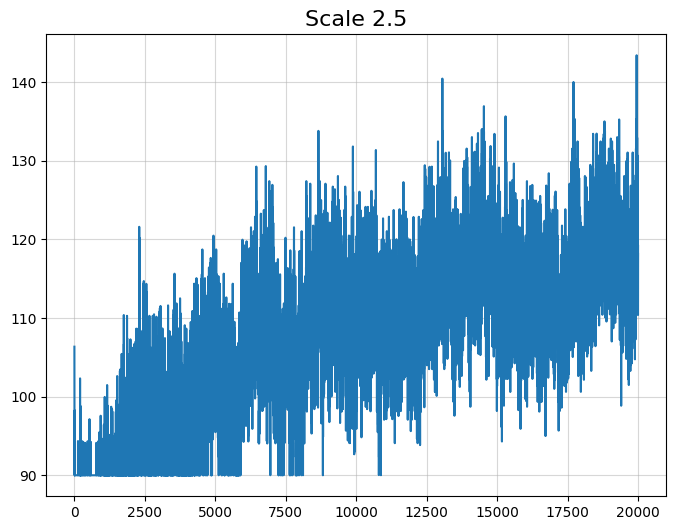

In [7]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.plot(angles_2_5)

plt.title('Scale 2.5', fontsize=16)
plt.show()

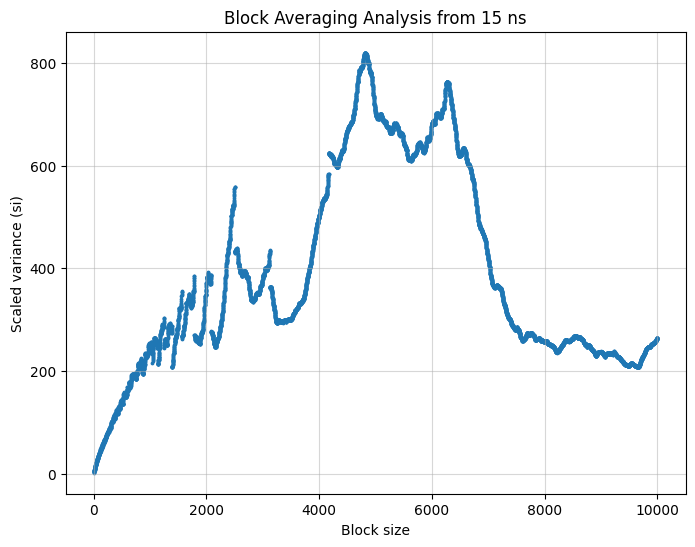

In [20]:
# Input array
begin = 15_000 // timestep
x = angles_2_5[begin:]

# Compute variance, mean, and length
v = np.var(x, ddof=1)  # ddof=1 for sample variance (like in R)
m = np.mean(x)
n = len(x)

si = []  # List to store the scaled variances
for t in range(2, 10001):  # Equivalent to seq(2, 1000)
    nblocks = n // t  # Number of blocks
    if nblocks > 0:
        # Create blocks of size `t`
        xg = np.split(x[:nblocks * t], nblocks)
        # Calculate mean of each block
        block_means = np.array([np.mean(block) for block in xg])
        # Variance of the block means
        v2 = np.sum((block_means - m) ** 2) / nblocks
        # Compute scaled variance and append
        si.append(t * v2 / v)
    else:
        break

# Plot the result
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.scatter(range(2, 2 + len(si)), si, s=3)

plt.xlabel('Block size')
plt.ylabel('Scaled variance (si)')
plt.title('Block Averaging Analysis from 15 ns')

plt.show()


In [22]:
block_lenght = 2000

angles_2_5_trunc = []
for i in tqdm(range(len(denses_2_5)%block_lenght, len(denses_2_5), block_lenght)):
    mean_dens = np.mean(denses_2_5[i:i+block_lenght, :], axis=0)
    mean_axis = np.mean(axises_2_5[i:i+block_lenght, :], axis=0)

    _, _, best_i = _profile_approx_alpha_from_array(
        mean_dens, mean_axis, rho_bulk, l, phi, H, interface_type, display
    )

    angles_2_5_trunc.append(np.rad2deg(best_i['theta']))

angles_2_5_trunc = np.array(angles_2_5_trunc)


00%|██████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 153.87it/s]

---

In [5]:
trajectory_file = '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.5_offset/cal_dec_tip4p.xtc'
topology_file = '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.5_offset/cal_dec_tip4p.gro'
residue = 'DECAN'
H = 9
l, phi = 18.004 / H, 0.5
rho_bulk = 3.0896 * 10
interface_type = 'roll'
sl=200
block_lenght=1_000
begin_time=0
time=40_000
timestep=2
units=1
display=False


axises_2_5_offset, denses_2_5_offset, angles_2_5_offset = get_each_density_profiles_and_angles(
    trajectory_file,
    topology_file,
    rho_bulk,
    l,
    phi,
    H,
    'roll',
    'DECAN',
    200,
    block_lenght,
    begin_time,
    time,
    timestep,
    display=display
)


00%|███████████████████████████████████████████████████████████████████████████| 40/40 [05:43<00:00,  8.58s/it]

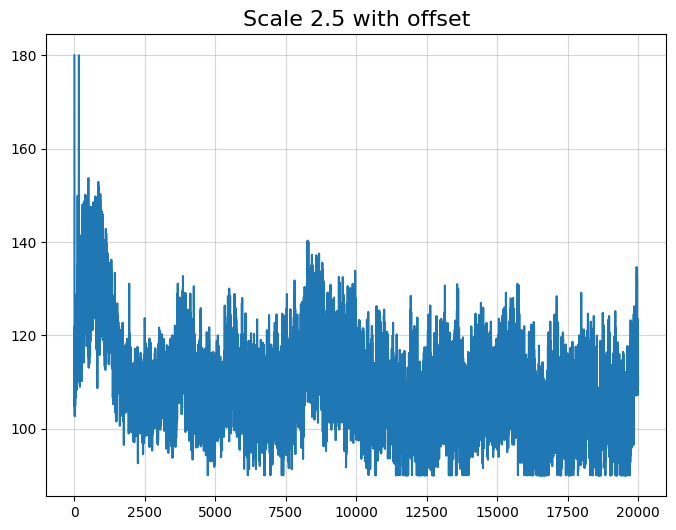

In [8]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.plot(angles_2_5_offset)

plt.title('Scale 2.5 with offset', fontsize=16)
plt.show()

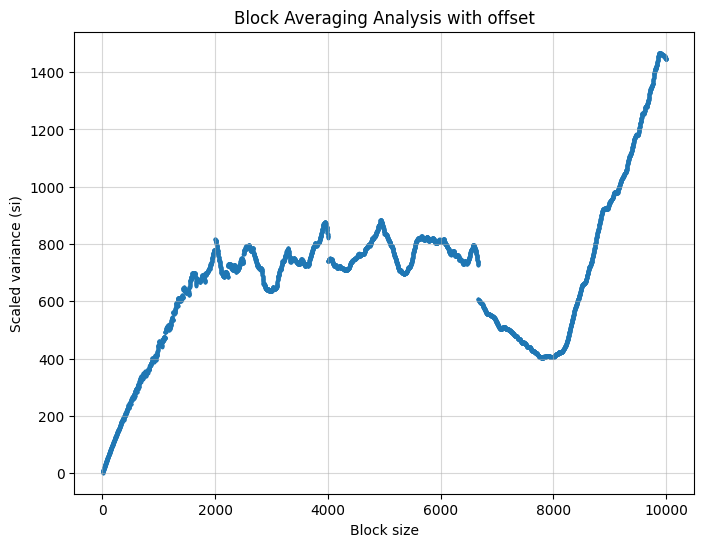

In [18]:
# Input array
begin = 0 // timestep
x = angles_2_5_offset[begin:]

# Compute variance, mean, and length
v = np.var(x, ddof=1)  # ddof=1 for sample variance (like in R)
m = np.mean(x)
n = len(x)

si = []  # List to store the scaled variances
for t in range(2, 10001):  # Equivalent to seq(2, 1000)
    nblocks = n // t  # Number of blocks
    if nblocks > 0:
        # Create blocks of size `t`
        xg = np.split(x[:nblocks * t], nblocks)
        # Calculate mean of each block
        block_means = np.array([np.mean(block) for block in xg])
        # Variance of the block means
        v2 = np.sum((block_means - m) ** 2) / nblocks
        # Compute scaled variance and append
        si.append(t * v2 / v)
    else:
        break

# Plot the result
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.scatter(range(2, 2 + len(si)), si, s=3)

plt.xlabel('Block size')
plt.ylabel('Scaled variance (si)')
plt.title('Block Averaging Analysis with offset')

plt.show()

In [23]:
block_lenght = 2000

angles_2_5_offset_trunc = []
for i in tqdm(range(len(denses_2_5_offset)%block_lenght, len(denses_2_5_offset), block_lenght)):
    mean_dens = np.mean(denses_2_5_offset[i:i+block_lenght, :], axis=0)
    mean_axis = np.mean(axises_2_5_offset[i:i+block_lenght, :], axis=0)

    _, _, best_i = _profile_approx_alpha_from_array(
        mean_dens, mean_axis, rho_bulk, l, phi, H, interface_type, display
    )

    angles_2_5_offset_trunc.append(np.rad2deg(best_i['theta']))

angles_2_5_offset_trunc = np.array(angles_2_5_offset_trunc)


00%|██████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 113.31it/s]

---

In [27]:
angles_2_5_offset_trunc.shape

(10,)

In [29]:
len(range(0, 40_000, 4_000))

10

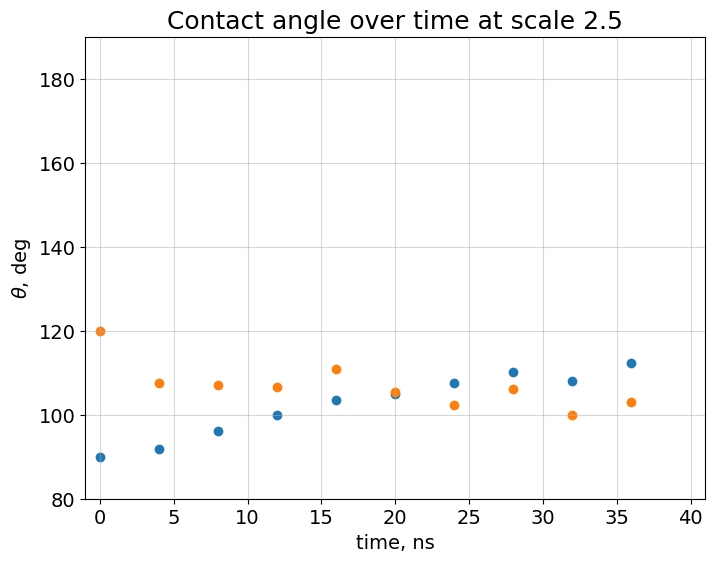

In [38]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.scatter(range(0, 40, 4), angles_2_5_trunc, label='initial')
plt.scatter(range(0, 40, 4), angles_2_5_offset_trunc, label='offset')

plt.title(f'Contact angle over time at scale 2.5', fontsize=18)
plt.xlim(-1, 41)
plt.ylim(80, 190)
plt.xlabel('time, ns', fontsize=14)
plt.ylabel(r'$\theta$, deg', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)

plt.show()

---

In [4]:
args = {
    "trajectory_file": '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.5/cal_dec_tip4p.xtc',
    "topology_file": '/home/fluffymelon/PANDA_exp/scaling/calcite_decane_tip4p_sc_2.5/cal_dec_tip4p.gro',
    "residue": 'DECAN',
    "H": 9,
    "l": 18.004 / 9, 
    "phi": 0.5,
    "rho_bulk": 3.0896 * 10,
    "interface_type": 'roll',
    "sl": 200,
    "chunk_length": 1_000,
    "begin_time": 0,
    "time": 40_000,
    "timestep": 2,
    "max_block_length": 10_000,
    "units": 'ps',
    "display": False,
}

block_sizes, si = get_statistical_inefficiency_RCA(**args)

Calculating all density profiles



00%|███████████████████████████████████████████████████████████████████████████| 40/40 [03:09<00:00,  4.74s/it]

Calculating contact angles



00%|████████████████████████████████████████████████████████████████████| 20000/20000 [01:31<00:00, 218.38it/s]

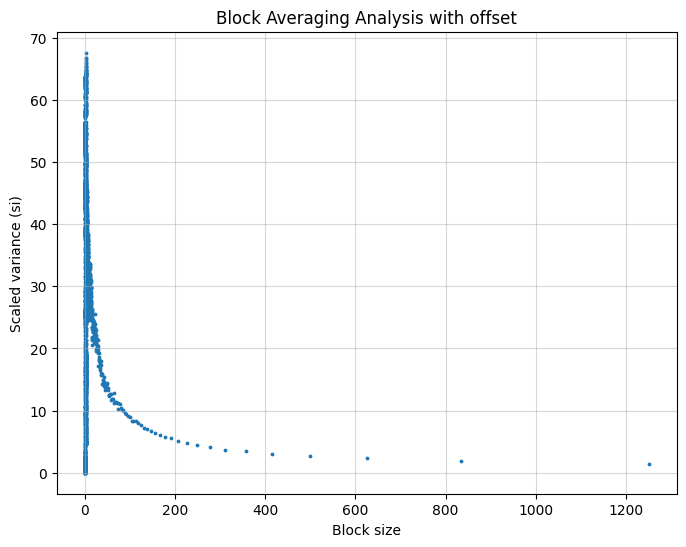

In [3]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.scatter(block_sizes, si, s=3)

plt.xlabel('Block size')
plt.ylabel('Scaled variance (si)')
plt.title('Block Averaging Analysis with offset')

plt.show()